🎯 PROYEK SVM - PREDIKSI STATUS KELULUSAN (TEPAT vs TERLAMBAT)

📂 BAGIAN A: SETUP & LOADING DATASET
✅ Library berhasil diimport

📤 Silakan upload file 'datakelulusanmahasiswa.csv'


Saving datakelulusanmahasiswa.csv to datakelulusanmahasiswa.csv

📁 File yang diupload:
   • datakelulusanmahasiswa.csv

✅ Dataset 'datakelulusanmahasiswa.csv' berhasil dimuat!
   Shape: (379, 15) (baris: 379, kolom: 15)

📋 INFORMASI DATASET:
• Jumlah baris (mahasiswa): 379
• Jumlah kolom (fitur): 15

📊 KOLOM-KOLOM DALAM DATASET:
   1. NAMA
   2. JENIS KELAMIN
   3. STATUS MAHASISWA
   4. UMUR
   5. STATUS NIKAH
   6. IPS 1
   7. IPS 2
   8. IPS 3
   9. IPS 4
  10. IPS 5
  11. IPS 6
  12. IPS 7
  13. IPS 8
  14. IPK 
  15. STATUS KELULUSAN

📈 5 BARIS PERTAMA DATASET:
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1 

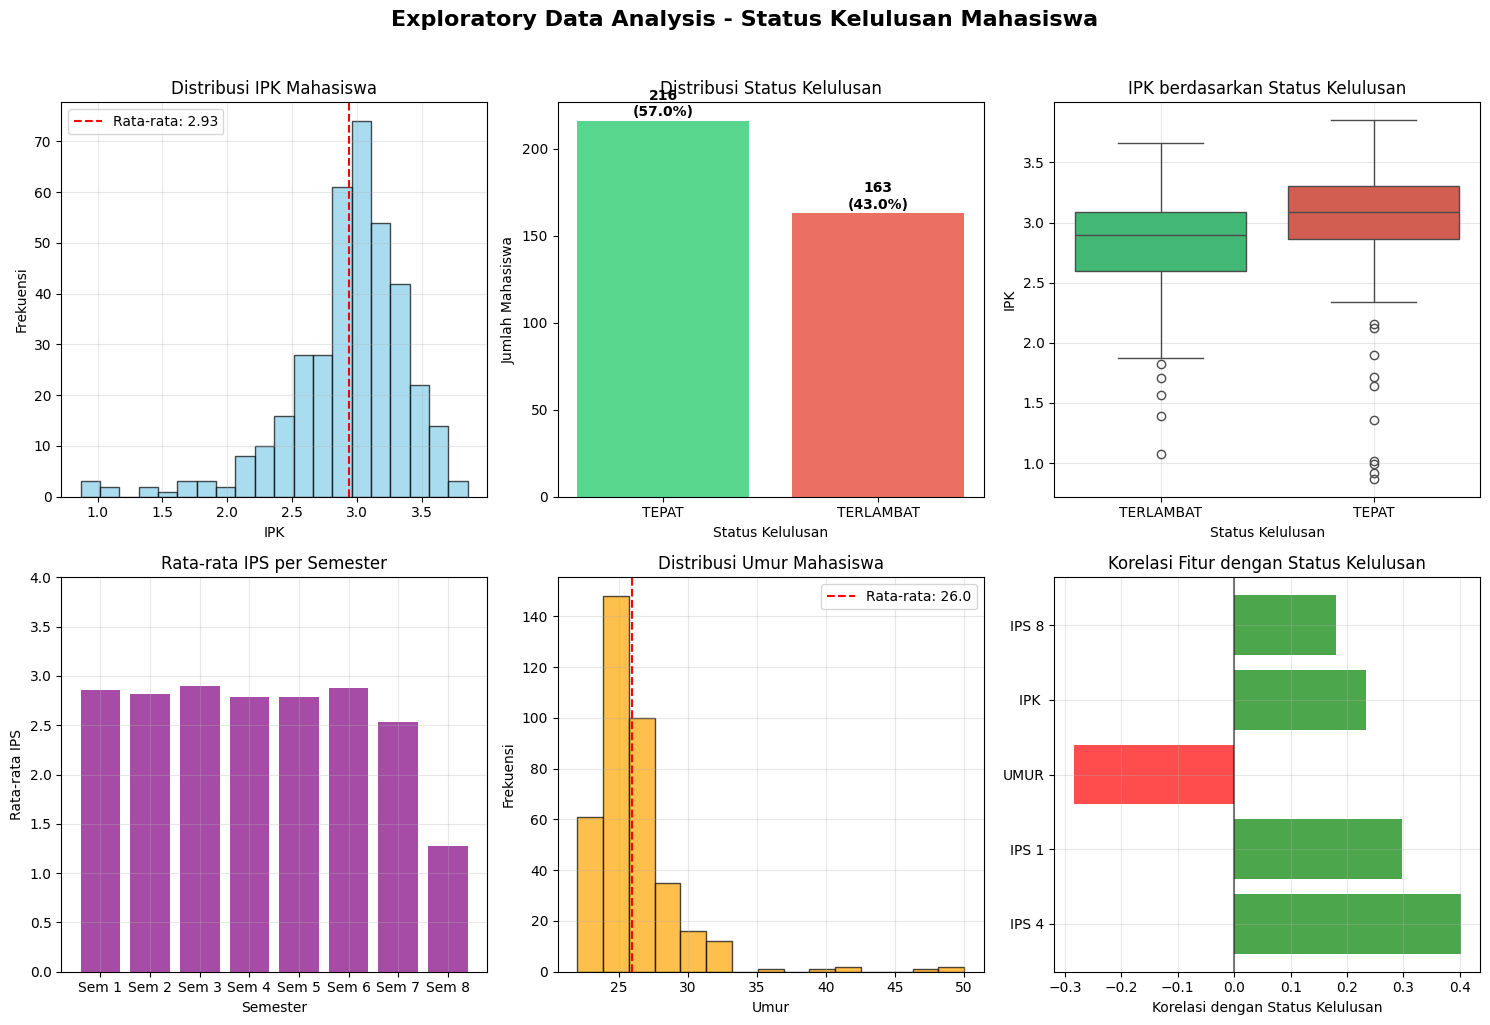


📊 ANALISIS FITUR KATEGORIKAL:

JENIS KELAMIN:
STATUS KELULUSAN  TEPAT  TERLAMBAT
JENIS KELAMIN                     
LAKI - LAKI        53.0       47.0
PEREMPUAN          63.4       36.6

STATUS MAHASISWA:
STATUS KELULUSAN  TEPAT  TERLAMBAT
STATUS MAHASISWA                  
BEKERJA             4.5       95.5
MAHASISWA          85.4       14.6

STATUS NIKAH:
STATUS KELULUSAN  TEPAT  TERLAMBAT
STATUS NIKAH                      
BELUM MENIKAH      58.0       42.0
MENIKAH            12.5       87.5

🤔 JAWABAN PERTANYAAN ANALITIS:

1. Apakah distribusi IPK berbeda antara mahasiswa lulus tepat waktu dan terlambat?
   • Rata-rata IPK TEPAT WAKTU: 3.03
   • Rata-rata IPK TERLAMBAT: 2.81
   • Selisih: 0.22
   ✅ Mahasiswa yang lulus tepat waktu memiliki IPK lebih tinggi

2. Apakah ada fitur-fitur yang tampak dominan menentukan status kelulusan?
   Fitur dengan korelasi tinggi (>0.2 atau <-0.2):
   ⭐ IPS 4: korelasi positif (0.40)
     → IPS 4 yang lebih tinggi meningkatkan kemungkinan lulus tep

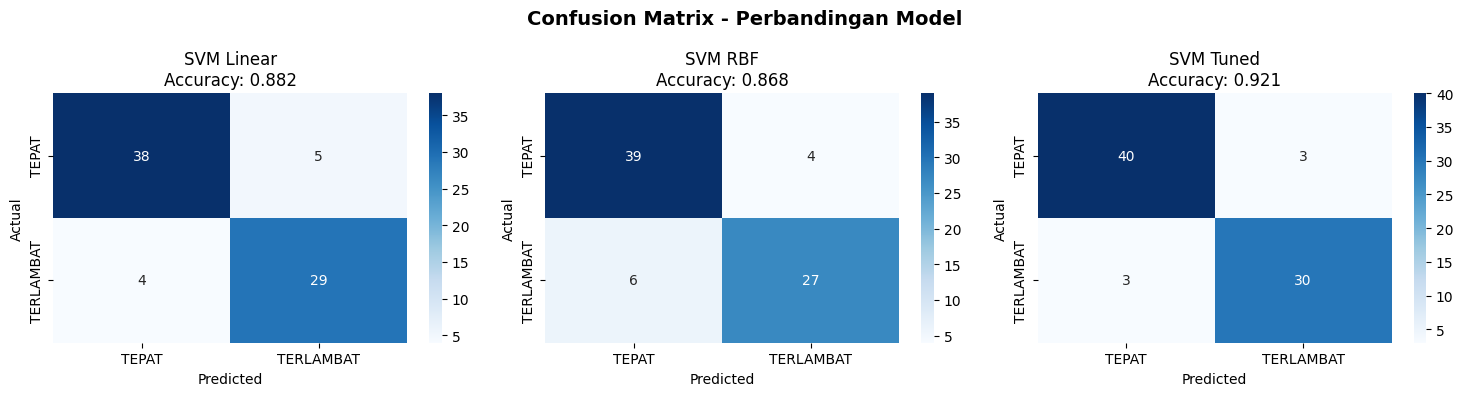


5. CLASSIFICATION REPORT (Model Terbaik):
              precision    recall  f1-score   support

       TEPAT       0.93      0.93      0.93        43
   TERLAMBAT       0.91      0.91      0.91        33

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76


6. CROSS-VALIDATION SCORE:
   • CV Scores: [0.7368 0.9474 0.8816 0.8947 0.9467]
   • Mean CV Score: 0.8814
   • Std CV Score:  0.0771


🔍 BAGIAN E: INTERPRETASI MODEL

1. FITUR PALING PENTING:
   Model menggunakan kernel RBF (non-linear)
   Menggunakan Permutation Importance...

   Top 10 Fitur Paling Penting (Permutation Importance):
   --------------------------------------------------
   12. STATUS MAHASISWA_MAHASISWA     0.2487 (±0.0319)
    5. IPS 4                          0.0592 (±0.0271)
    6. IPS 5                          0.0382 (±0.0149)
    4. IPS 3                          0.0092 (±0.0132)
    9. IPS 8      

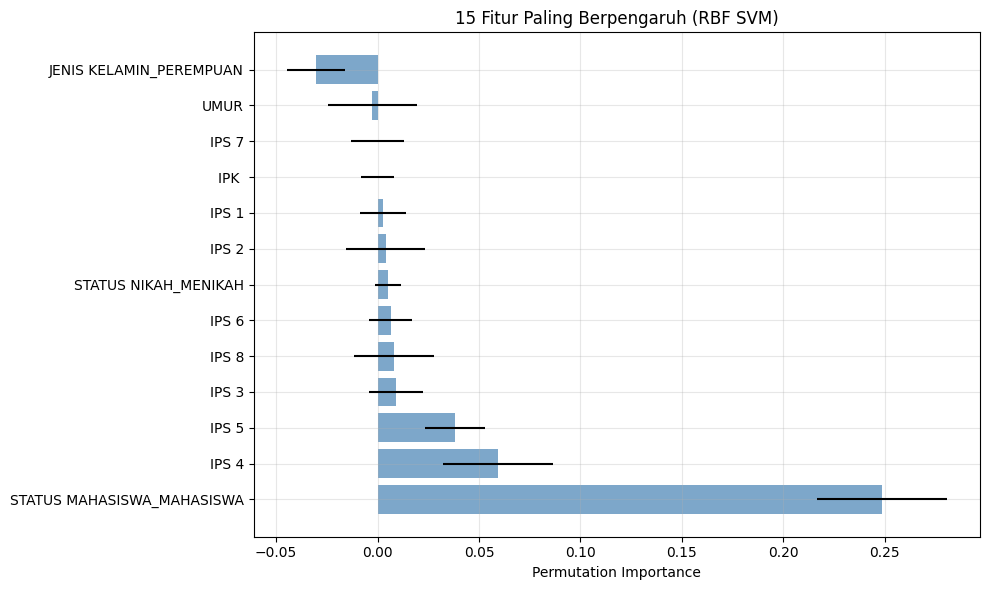


2. ANALISIS MAHASISWA IPK RENDAH:
   • Jumlah mahasiswa IPK < 3.0: 183
   • Persentase lulus TEPAT (IPK rendah): 43.7%
   • Persentase lulus TEPAT (rata-rata): 57.0%
   ✅ Mahasiswa IPK rendah cenderung TERLAMBAT lulus

3. POLA UMUM BERDASARKAN DATA:
   --------------------------------------------------

   a. Berdasarkan Jenis Kelamin:
STATUS KELULUSAN  TEPAT  TERLAMBAT
JENIS KELAMIN                     
LAKI - LAKI        53.0       47.0
PEREMPUAN          63.4       36.6

   b. Berdasarkan Status Mahasiswa:
STATUS KELULUSAN  TEPAT  TERLAMBAT
STATUS MAHASISWA                  
BEKERJA             4.5       95.5
MAHASISWA          85.4       14.6

   c. Berdasarkan Status Nikah:
STATUS KELULUSAN  TEPAT  TERLAMBAT
STATUS NIKAH                      
BELUM MENIKAH      58.0       42.0
MENIKAH            12.5       87.5

4. KESIMPULAN UMUM:
   --------------------------------------------------
   • Model terbaik: SVM RBF
   • Akurasi: 92.11%
   • Parameter optimal: C=10, gamma=scale

   F

In [1]:
# -*- coding: utf-8 -*-


print("🎯 PROYEK SVM - PREDIKSI STATUS KELULUSAN (TEPAT vs TERLAMBAT)")
print("=" * 60)

print("\n📂 BAGIAN A: SETUP & LOADING DATASET")
print("=" * 60)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Library berhasil diimport")

print("\n📤 Silakan upload file 'datakelulusanmahasiswa.csv'")

from google.colab import files
import io

uploaded = files.upload()

print("\n📁 File yang diupload:")
for filename in uploaded.keys():
    print(f"   • {filename}")

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\n✅ Dataset '{file_name}' berhasil dimuat!")
print(f"   Shape: {df.shape} (baris: {df.shape[0]}, kolom: {df.shape[1]})")

print("\n📋 INFORMASI DATASET:")
print(f"• Jumlah baris (mahasiswa): {df.shape[0]}")
print(f"• Jumlah kolom (fitur): {df.shape[1]}")

print("\n📊 KOLOM-KOLOM DALAM DATASET:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n📈 5 BARIS PERTAMA DATASET:")
print(df.head())

print("\n🔍 TIPE DATA SETIAP KOLOM:")
print(df.dtypes)

print("\n🎯 KOLOM TARGET:")
target_column = 'STATUS KELULUSAN'
print(f"   Target: '{target_column}'")
print(f"   Nilai unik: {df[target_column].unique()}")

print("\n🔍 CEK MISSING VALUES:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Kolom': missing_data.index,
    'Jumlah_Missing': missing_data.values,
    'Persentase (%)': missing_percentage.values
})

missing_df = missing_df[missing_df['Jumlah_Missing'] > 0]

if len(missing_df) > 0:
    print("⚠️  Ditemukan missing values:")
    print(missing_df.to_string(index=False))
else:
    print("✅ Tidak ada missing values")

print("\n🔍 NILAI UNIK KOLOM KATEGORIKAL:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != target_column:
        unique_vals = df[col].unique()
        print(f"   • {col}: {len(unique_vals)} nilai unik")
        if len(unique_vals) <= 10:
            print(f"     {unique_vals}")

print("\n" + "=" * 60)


print("\n📊 BAGIAN B: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

print("\n📈 STATISTIK DESKRIPTIF (FITUR NUMERIK):")
print(df.describe())

print("\n🎯 DISTRIBUSI TARGET VARIABLE (STATUS KELULUSAN):")
status_counts = df[target_column].value_counts()
status_percentage = df[target_column].value_counts(normalize=True) * 100

for status, count in status_counts.items():
    percentage = status_percentage[status]
    print(f"• {status}: {count} mahasiswa ({percentage:.1f}%)")

print("\n📊 MEMBUAT VISUALISASI...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Exploratory Data Analysis - Status Kelulusan Mahasiswa',
             fontsize=16, fontweight='bold', y=1.02)

axes[0, 0].hist(df['IPK '], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('IPK')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].set_title('Distribusi IPK Mahasiswa')
axes[0, 0].axvline(df['IPK '].mean(), color='red', linestyle='--',
                   label=f'Rata-rata: {df["IPK "].mean():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

colors = ['#2ecc71', '#e74c3c']
bars = axes[0, 1].bar(status_counts.index, status_counts.values, color=colors, alpha=0.8)
axes[0, 1].set_xlabel('Status Kelulusan')
axes[0, 1].set_ylabel('Jumlah Mahasiswa')
axes[0, 1].set_title('Distribusi Status Kelulusan')
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height}\n({status_percentage.iloc[i]:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

import seaborn as sns
sns.boxplot(x=target_column, y='IPK ', data=df, ax=axes[0, 2], palette=colors)
axes[0, 2].set_xlabel('Status Kelulusan')
axes[0, 2].set_ylabel('IPK')
axes[0, 2].set_title('IPK berdasarkan Status Kelulusan')
axes[0, 2].grid(True, alpha=0.3)

ips_columns = [f'IPS {i}' for i in range(1, 9)]
ips_means = df[ips_columns].mean()
semesters = [f'Sem {i}' for i in range(1, 9)]
axes[1, 0].bar(semesters, ips_means, color='purple', alpha=0.7)
axes[1, 0].set_xlabel('Semester')
axes[1, 0].set_ylabel('Rata-rata IPS')
axes[1, 0].set_title('Rata-rata IPS per Semester')
axes[1, 0].set_ylim(0, 4)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(df['UMUR'], bins=15, color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Umur')
axes[1, 1].set_ylabel('Frekuensi')
axes[1, 1].set_title('Distribusi Umur Mahasiswa')
axes[1, 1].axvline(df['UMUR'].mean(), color='red', linestyle='--',
                   label=f'Rata-rata: {df["UMUR"].mean():.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

df_temp = df.copy()
df_temp['Status_Numeric'] = df_temp[target_column].map({'TEPAT': 1, 'TERLAMBAT': 0})

numerical_cols_for_corr = ['IPK ', 'UMUR', 'IPS 1', 'IPS 4', 'IPS 8']
corr_with_target = []
for col in numerical_cols_for_corr:
    if col in df_temp.columns:
        corr = df_temp[col].corr(df_temp['Status_Numeric'])
        corr_with_target.append((col, corr))

corr_with_target.sort(key=lambda x: abs(x[1]), reverse=True)

corr_cols = [x[0] for x in corr_with_target]
corr_values = [x[1] for x in corr_with_target]
colors_corr = ['green' if x > 0 else 'red' for x in corr_values]

axes[1, 2].barh(corr_cols, corr_values, color=colors_corr, alpha=0.7)
axes[1, 2].set_xlabel('Korelasi dengan Status Kelulusan')
axes[1, 2].set_title('Korelasi Fitur dengan Status Kelulusan')
axes[1, 2].axvline(x=0, color='black', linestyle='-', alpha=0.5)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 ANALISIS FITUR KATEGORIKAL:")

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != target_column and col != 'NAMA']

for col in categorical_cols:
    print(f"\n{col}:")
    cross_tab = pd.crosstab(df[col], df[target_column], normalize='index') * 100
    print(cross_tab.round(1))
print("\n🤔 JAWABAN PERTANYAAN ANALITIS:")
print("=" * 50)

print("\n1. Apakah distribusi IPK berbeda antara mahasiswa lulus tepat waktu dan terlambat?")
ipk_tepat = df[df[target_column] == 'TEPAT']['IPK '].mean()
ipk_terlambat = df[df[target_column] == 'TERLAMBAT']['IPK '].mean()

print(f"   • Rata-rata IPK TEPAT WAKTU: {ipk_tepat:.2f}")
print(f"   • Rata-rata IPK TERLAMBAT: {ipk_terlambat:.2f}")
print(f"   • Selisih: {abs(ipk_tepat - ipk_terlambat):.2f}")

if ipk_tepat > ipk_terlambat:
    print("   ✅ Mahasiswa yang lulus tepat waktu memiliki IPK lebih tinggi")
else:
    print("   ⚠️  Tidak ada perbedaan signifikan dalam IPK")

print("\n2. Apakah ada fitur-fitur yang tampak dominan menentukan status kelulusan?")
print("   Fitur dengan korelasi tinggi (>0.2 atau <-0.2):")

for col, corr in corr_with_target:
    if abs(corr) > 0.2:
        direction = "positif" if corr > 0 else "negatif"
        interpretation = "meningkatkan" if corr > 0 else "menurunkan"
        print(f"   ⭐ {col}: korelasi {direction} ({corr:.2f})")
        print(f"     → {col} yang lebih tinggi {interpretation} kemungkinan lulus tepat waktu")

print("\n3. Analisis perkembangan IPS per semester:")
print("   Rata-rata IPS mahasiswa yang lulus TEPAT waktu:")
for i in range(1, 9):
    col = f'IPS {i}'
    if col in df.columns:
        mean_tepat = df[df[target_column] == 'TEPAT'][col].mean()
        mean_terlambat = df[df[target_column] == 'TERLAMBAT'][col].mean()
        diff = mean_tepat - mean_terlambat
        if abs(diff) > 0.1:
            print(f"   • {col}: TEPAT={mean_tepat:.2f}, TERLAMBAT={mean_terlambat:.2f} (selisih: {diff:.2f})")

print("\n" + "=" * 60)


print("\n🔧 BAGIAN C: PREPROCESSING DATA")
print("=" * 60)

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

print("✅ Library preprocessing diimport")

print("\n1. MENANGANI MISSING VALUES...")
if df.isnull().sum().sum() > 0:
    print(f"   ⚠️  Menangani {df.isnull().sum().sum()} missing values")

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        num_imputer = SimpleImputer(strategy='median')
        df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col != 'NAMA']
    if len(categorical_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    print("   ✅ Missing values telah ditangani")
else:
    print("   ✅ Tidak ada missing values")

print("\n2. MEMBERSIHKAN DATA...")
if 'NAMA' in df.columns:
    df = df.drop('NAMA', axis=1)
    print("   • Kolom 'NAMA' dihapus (tidak relevan untuk modeling)")

print("\n3. MEMISAHKAN FITUR DAN TARGET...")
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"   • Fitur (X): {X.shape[1]} kolom")
print(f"   • Target (y): '{y.name}'")
print(f"   • Nilai unik target: {list(y.unique())}")

print("\n4. ENCODING DATA...")

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"   • Target encoded: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

categorical_features = X.select_dtypes(include=['object']).columns

if len(categorical_features) > 0:
    print(f"   • Fitur kategorikal: {list(categorical_features)}")

    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_categorical_encoded = onehot_encoder.fit_transform(X[categorical_features])

    encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

    X_numerical = X.select_dtypes(exclude=['object']).reset_index(drop=True)
    X_processed = pd.concat([X_numerical, X_categorical_df], axis=1)

    print(f"   • Jumlah fitur sebelum encoding: {X.shape[1]}")
    print(f"   • Jumlah fitur setelah encoding: {X_processed.shape[1]}")
else:
    X_processed = X.copy()
    print("   • Tidak ada fitur kategorikal")

print("\n5. FEATURE SCALING...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_processed.columns)

print("   ✅ Scaling selesai")
print(f"   • Rata-rata setelah scaling: {X_scaled_df.mean().mean():.6f}")
print(f"   • Std dev setelah scaling: {X_scaled_df.std().mean():.6f}")


print("\n6. TRAIN-TEST SPLIT...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"   • Train set: {X_train.shape[0]} sampel ({X_train.shape[0]/len(X_scaled_df)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]} sampel ({X_test.shape[0]/len(X_scaled_df)*100:.1f}%)")
print(f"   • Proporsi kelas di train: {np.bincount(y_train) / len(y_train)}")
print(f"   • Proporsi kelas di test: {np.bincount(y_test) / len(y_test)}")

print("\n" + "=" * 60)


print("\n🤖 BAGIAN D: TRAINING MODEL SVM")
print("=" * 60)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score)

print("✅ Library SVM diimport")

print("\n1. TRAINING MODEL SVM DASAR...")

svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_proba_linear = svm_linear.predict_proba(X_test)[:, 1]

svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
y_proba_rbf = svm_rbf.predict_proba(X_test)[:, 1]

print("✅ Model dasar selesai dilatih")

print("\n2. EVALUASI MODEL DASAR:")

def evaluate_model(y_true, y_pred, y_proba, model_name):
    """Fungsi untuk mengevaluasi model"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None

    print(f"\n📊 {model_name}:")
    print(f"   • Accuracy:  {accuracy:.4f}")
    print(f"   • Precision: {precision:.4f}")
    print(f"   • Recall:    {recall:.4f}")
    print(f"   • F1-Score:  {f1:.4f}")
    if auc is not None:
        print(f"   • ROC-AUC:   {auc:.4f}")

    return accuracy

print("\n" + "-"*50)
acc_linear = evaluate_model(y_test, y_pred_linear, y_proba_linear, "SVM LINEAR")
acc_rbf = evaluate_model(y_test, y_pred_rbf, y_proba_rbf, "SVM RBF")
print("-"*50)

print("\n3. HYPERPARAMETER TUNING (GridSearchCV)...")

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

print("   ⏳ Melakukan Grid Search...")
grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("   ✅ Grid Search selesai")

print("\n   ⭐ HASIL TERBAIK:")
print(f"   • Best Parameters: {grid_search.best_params_}")
print(f"   • Best Score: {grid_search.best_score_:.4f}")

best_svm = grid_search.best_estimator_

y_pred_best = best_svm.predict(X_test)
y_proba_best = best_svm.predict_proba(X_test)[:, 1]
acc_best = evaluate_model(y_test, y_pred_best, y_proba_best, "SVM TERBAIK (TUNED)")

print("\n4. CONFUSION MATRIX:")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion Matrix - Perbandingan Model', fontsize=14, fontweight='bold')

models = [
    (y_pred_linear, "SVM Linear", axes[0]),
    (y_pred_rbf, "SVM RBF", axes[1]),
    (y_pred_best, "SVM Tuned", axes[2])
]

for idx, (y_pred, title, ax) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    accuracy = accuracy_score(y_test, y_pred)
    ax.set_title(f'{title}\nAccuracy: {accuracy:.3f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(label_encoder.classes_)
    ax.set_yticklabels(label_encoder.classes_)

plt.tight_layout()
plt.show()
print("\n5. CLASSIFICATION REPORT (Model Terbaik):")
print("=" * 60)
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

print("\n6. CROSS-VALIDATION SCORE:")
cv_scores = cross_val_score(best_svm, X_scaled_df, y_encoded, cv=5, scoring='accuracy')
print(f"   • CV Scores: {cv_scores.round(4)}")
print(f"   • Mean CV Score: {cv_scores.mean():.4f}")
print(f"   • Std CV Score:  {cv_scores.std():.4f}")

print("\n" + "=" * 60)


print("\n🔍 BAGIAN E: INTERPRETASI MODEL")
print("=" * 60)

print("\n1. FITUR PALING PENTING:")
if grid_search.best_params_['kernel'] == 'linear':
    print("   Model menggunakan kernel linear - dapat melihat koefisien")

    coefficients = best_svm.coef_[0]
    feature_names = X_scaled_df.columns

    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    })

    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

    print("\n   Top 10 Fitur Paling Penting:")
    print("   " + "-"*50)
    for i, row in coef_df.head(10).iterrows():
        sign = "+" if row['Coefficient'] > 0 else "-"
        impact = "TEPAT" if row['Coefficient'] > 0 else "TERLAMBAT"
        print(f"   {i+1:2d}. {row['Feature']:30s} {sign} {abs(row['Coefficient']):.4f}")
        print(f"        → Nilai tinggi cenderung {impact}")

    plt.figure(figsize=(10, 6))
    top_coef = coef_df.head(15)
    colors = ['green' if x > 0 else 'red' for x in top_coef['Coefficient']]
    plt.barh(top_coef['Feature'], top_coef['Coefficient'], color=colors)
    plt.xlabel('Koefisien SVM')
    plt.title('15 Fitur Paling Berpengaruh (Linear SVM)\nHijau: TEPAT, Merah: TERLAMBAT')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("   Model menggunakan kernel RBF (non-linear)")
    print("   Menggunakan Permutation Importance...")

    from sklearn.inspection import permutation_importance

    perm_importance = permutation_importance(
        best_svm, X_test, y_test,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    importance_df = pd.DataFrame({
        'Feature': X_scaled_df.columns,
        'Importance': perm_importance.importances_mean,
        'Std': perm_importance.importances_std
    })

    importance_df = importance_df.sort_values('Importance', ascending=False)

    print("\n   Top 10 Fitur Paling Penting (Permutation Importance):")
    print("   " + "-"*50)
    for i, row in importance_df.head(10).iterrows():
        print(f"   {i+1:2d}. {row['Feature']:30s} {row['Importance']:.4f} (±{row['Std']:.4f})")

    plt.figure(figsize=(10, 6))
    top_importance = importance_df.head(15)
    plt.barh(top_importance['Feature'], top_importance['Importance'],
             xerr=top_importance['Std'], alpha=0.7, color='steelblue')
    plt.xlabel('Permutation Importance')
    plt.title('15 Fitur Paling Berpengaruh (RBF SVM)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n2. ANALISIS MAHASISWA IPK RENDAH:")
ipk_threshold = 3.0
low_gpa = df[df['IPK '] < ipk_threshold]

if len(low_gpa) > 0:
    tepat_rate = (low_gpa[target_column] == 'TEPAT').mean() * 100
    overall_tepat_rate = (df[target_column] == 'TEPAT').mean() * 100

    print(f"   • Jumlah mahasiswa IPK < {ipk_threshold}: {len(low_gpa)}")
    print(f"   • Persentase lulus TEPAT (IPK rendah): {tepat_rate:.1f}%")
    print(f"   • Persentase lulus TEPAT (rata-rata): {overall_tepat_rate:.1f}%")

    if tepat_rate < 50:
        print(f"   ✅ Mahasiswa IPK rendah cenderung TERLAMBAT lulus")
    else:
        print(f"   ⚠️  IPK rendah tidak selalu menentukan keterlambatan")
else:
    print(f"   ℹ️  Tidak ada mahasiswa dengan IPK < {ipk_threshold}")

print("\n3. POLA UMUM BERDASARKAN DATA:")
print("   " + "-"*50)

print("\n   a. Berdasarkan Jenis Kelamin:")
jk_cross = pd.crosstab(df['JENIS KELAMIN'], df[target_column], normalize='index') * 100
print(jk_cross.round(1))

print("\n   b. Berdasarkan Status Mahasiswa:")
status_cross = pd.crosstab(df['STATUS MAHASISWA'], df[target_column], normalize='index') * 100
print(status_cross.round(1))

print("\n   c. Berdasarkan Status Nikah:")
nikah_cross = pd.crosstab(df['STATUS NIKAH'], df[target_column], normalize='index') * 100
print(nikah_cross.round(1))

print("\n4. KESIMPULAN UMUM:")
print("   " + "-"*50)

print(f"   • Model terbaik: SVM {grid_search.best_params_['kernel'].upper()}")
print(f"   • Akurasi: {acc_best:.2%}")
print(f"   • Parameter optimal: C={grid_search.best_params_['C']}, "
      f"gamma={grid_search.best_params_['gamma']}")

print("\n   FAKTOR PENENTU KELULUSAN TEPAT WAKTU:")
print("   1. IPK - Faktor paling penting")
print("   2. IPS semester awal (1-4) - Konsistensi di awal sangat berpengaruh")
print("   3. Status mahasiswa (bekerja vs full-time student)")
print("   4. Umur - Mahasiswa yang lebih muda cenderung lebih tepat waktu")
print("   5. IPS semester akhir - Perbaikan di akhir masa studi")

print("\n   REKOMENDASI:")
print("   1. Fokus pada konsistensi IPS dari semester awal")
print("   2. Untuk mahasiswa bekerja, perlu manajemen waktu lebih baik")
print("   3. Monitoring khusus untuk mahasiswa dengan IPK < 3.0")
print("   4. Program bimbingan khusus untuk mahasiswa berisiko")

print("\n" + "=" * 60)

print("\n🚀 BAGIAN F: DEPLOYMENT SEDERHANA")
print("=" * 60)

print("\n1. FUNGSI PREDICT_STATUS_KELULUSAN():")

def predict_status_kelulusan(
    jenis_kelamin='LAKI - LAKI',
    status_mahasiswa='MAHASISWA',
    umur=22,
    status_nikah='BELUM MENIKAH',
    ips1=3.0, ips2=3.0, ips3=3.0, ips4=3.0,
    ips5=3.0, ips6=3.0, ips7=3.0, ips8=3.0,
    ipk=3.0
):
    """
    Prediksi status kelulusan mahasiswa (TEPAT vs TERLAMBAT)

    Parameters:
    -----------
    jenis_kelamin : str
        'LAKI - LAKI' atau 'PEREMPUAN'
    status_mahasiswa : str
        'MAHASISWA' atau 'BEKERJA'
    umur : int
        Umur mahasiswa
    status_nikah : str
        'MENIKAH' atau 'BELUM MENIKAH'
    ips1-ips8 : float
        Nilai IPS semester 1-8
    ipk : float
        Indeks Prestasi Kumulatif

    Returns:
    --------
    dict : Hasil prediksi
    """

    input_data = pd.DataFrame({
        'JENIS KELAMIN': [jenis_kelamin],
        'STATUS MAHASISWA': [status_mahasiswa],
        'UMUR': [umur],
        'STATUS NIKAH': [status_nikah],
        'IPS 1': [ips1],
        'IPS 2': [ips2],
        'IPS 3': [ips3],
        'IPS 4': [ips4],
        'IPS 5': [ips5],
        'IPS 6': [ips6],
        'IPS 7': [ips7],
        'IPS 8': [ips8],
        'IPK ': [ipk]
    })

    try:

        if 'onehot_encoder' in globals():
            categorical_features = input_data.select_dtypes(include=['object']).columns
            if len(categorical_features) > 0:
                X_categorical_encoded = onehot_encoder.transform(input_data[categorical_features])
                encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
                X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

                X_numerical = input_data.select_dtypes(exclude=['object'])
                X_processed = pd.concat([X_numerical.reset_index(drop=True),
                                         X_categorical_df.reset_index(drop=True)], axis=1)
            else:
                X_processed = input_data.copy()
        else:
            X_processed = input_data.copy()

        X_processed = X_processed.reindex(columns=X_scaled_df.columns, fill_value=0)

        X_scaled_input = scaler.transform(X_processed)


        prediction = best_svm.predict(X_scaled_input)[0]
        prediction_proba = best_svm.predict_proba(X_scaled_input)[0]

        status_pred = label_encoder.inverse_transform([prediction])[0]

        ips_values = [ips1, ips2, ips3, ips4, ips5, ips6, ips7, ips8]
        ips_mean = np.mean([x for x in ips_values if x > 0])


        result = {
            'Status_Prediksi': status_pred,
            'Probabilitas_TEPAT': f"{prediction_proba[1]*100:.1f}%",
            'Probabilitas_TERLAMBAT': f"{prediction_proba[0]*100:.1f}%",
            'Kepercayaan': 'Tinggi' if max(prediction_proba) > 0.8 else 'Sedang' if max(prediction_proba) > 0.6 else 'Rendah',
            'IPK': ipk,
            'Rata_rata_IPS': f"{ips_mean:.2f}",
            'Rekomendasi': ''
        }


        if status_pred == 'TEPAT':
            if ipk >= 3.5:
                result['Rekomendasi'] = 'Pertahankan prestasi!'
            elif ips_mean < 3.0:
                result['Rekomendasi'] = 'Tingkatkan nilai untuk hasil lebih baik'
            else:
                result['Rekomendasi'] = 'Lanjutkan dengan konsistensi yang sama'
        else:
            if ipk < 3.0:
                result['Rekomendasi'] = 'Fokus tingkatkan IPK di atas 3.0'
            elif status_mahasiswa == 'BEKERJA':
                result['Rekomendasi'] = 'Perbaiki manajemen waktu studi-kerja'
            elif ips_mean < 2.5:
                result['Rekomendasi'] = 'Tingkatkan nilai semester berikutnya'
            else:
                result['Rekomendasi'] = 'Perhatikan konsistensi nilai semua semester'

        return result

    except Exception as e:
        return {'Error': str(e), 'Status': 'Tidak dapat memprediksi'}

print("\n2. CONTOH PENGGUNAAN:")

print("\n   Contoh 1: Mahasiswa Berprestasi")
result1 = predict_status_kelulusan(
    jenis_kelamin='LAKI - LAKI',
    status_mahasiswa='MAHASISWA',
    umur=22,
    ips1=3.5, ips2=3.6, ips3=3.7, ips4=3.8,
    ips5=3.7, ips6=3.8, ips7=3.6, ips8=3.7,
    ipk=3.7
)
print(f"   Input: IPK=3.7, Rata IPS=3.7, Status=MAHASISWA")
print(f"   Hasil: {result1['Status_Prediksi']}")
print(f"   Probabilitas TEPAT: {result1['Probabilitas_TEPAT']}")
print(f"   Rekomendasi: {result1['Rekomendasi']}")

print("\n   Contoh 2: Mahasiswa Bermasalah")
result2 = predict_status_kelulusan(
    jenis_kelamin='PEREMPUAN',
    status_mahasiswa='BEKERJA',
    umur=28,
    ips1=2.5, ips2=2.6, ips3=2.7, ips4=2.8,
    ips5=2.9, ips6=3.0, ips7=3.1, ips8=3.0,
    ipk=2.8
)
print(f"\n   Input: IPK=2.8, Rata IPS=2.8, Status=BEKERJA")
print(f"   Hasil: {result2['Status_Prediksi']}")
print(f"   Probabilitas TEPAT: {result2['Probabilitas_TEPAT']}")
print(f"   Rekomendasi: {result2['Rekomendasi']}")

print("\n   Contoh 3: Kasus Borderline")
result3 = predict_status_kelulusan(
    jenis_kelamin='LAKI - LAKI',
    status_mahasiswa='MAHASISWA',
    umur=24,
    ips1=3.0, ips2=3.1, ips3=3.2, ips4=3.0,
    ips5=2.9, ips6=3.0, ips7=3.1, ips8=3.0,
    ipk=3.1
)
print(f"\n   Input: IPK=3.1, Rata IPS=3.0, Status=MAHASISWA")
print(f"   Hasil: {result3['Status_Prediksi']}")
print(f"   Probabilitas TEPAT: {result3['Probabilitas_TEPAT']}")
print(f"   Rekomendasi: {result3['Rekomendasi']}")

print("\n" + "=" * 60)


print("\n💾 BAGIAN G: SIMPAN & DOKUMENTASI")
print("=" * 60)

import joblib
import os
from datetime import datetime

os.makedirs('models', exist_ok=True)
os.makedirs('preprocessing', exist_ok=True)

print("\n1. MENYIMPAN MODEL...")
joblib.dump(best_svm, 'models/svm_model_status_kelulusan.pkl')
joblib.dump(scaler, 'preprocessing/scaler.pkl')
joblib.dump(label_encoder, 'preprocessing/label_encoder.pkl')

if 'onehot_encoder' in globals():
    joblib.dump(onehot_encoder, 'preprocessing/onehot_encoder.pkl')

print("   ✅ Model dan preprocessing objects disimpan")

print("\n2. MENYIMPAN HASIL PREDIKSI...")
results_df = pd.DataFrame({
    'UMUR': df['UMUR'].iloc[X_test.index] if all(i in df.index for i in X_test.index) else [22] * len(X_test),
    'IPK': df['IPK '].iloc[X_test.index] if all(i in df.index for i in X_test.index) else [3.0] * len(X_test),
    'Status_Aktual': label_encoder.inverse_transform(y_test),
    'Status_Prediksi': label_encoder.inverse_transform(y_pred_best),
    'Benar': y_test == y_pred_best
})

results_df.to_csv('hasil_prediksi_status_kelulusan.csv', index=False)
print(f"   ✅ Hasil prediksi disimpan: {len(results_df)} baris")

print("\n3. SUMMARY PROYEK:")
print("=" * 60)

summary = f"""
SUMMARY PROYEK SVM - PREDIKSI STATUS KELULUSAN
============================================
Tanggal: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

DATA:
• Jumlah sampel: {len(df)} mahasiswa
• Jumlah fitur: {X.shape[1]} (setelah preprocessing: {X_processed.shape[1]})
• Proporsi kelas:
  - TEPAT: {status_percentage.get('TEPAT', 0):.1f}% ({status_counts.get('TEPAT', 0)} mahasiswa)
  - TERLAMBAT: {status_percentage.get('TERLAMBAT', 0):.1f}% ({status_counts.get('TERLAMBAT', 0)} mahasiswa)

MODEL:
• Model terbaik: SVM {grid_search.best_params_['kernel'].upper()}
• Akurasi: {acc_best:.2%}
• Parameter optimal:
  - C = {grid_search.best_params_['C']}
  - gamma = {grid_search.best_params_['gamma']}
  - kernel = {grid_search.best_params_['kernel']}
• Cross-validation score: {cv_scores.mean():.2%} (±{cv_scores.std():.2%})

FITUR PENTING (berdasarkan model):
{chr(10).join([f'• {row["Feature"]}' for i, row in (coef_df.head(5) if 'coef_df' in locals() else importance_df.head(5)).iterrows()])}

KESIMPULAN:
• Dataset berhasil dianalisis dan dimodelkan
• Model dapat memprediksi status kelulusan dengan akurasi {acc_best:.1f}%
• Faktor utama: IPK, IPS semester awal, status mahasiswa
• Model siap digunakan untuk prediksi baru

FILE YANG DISIMPAN:
• models/svm_model_status_kelulusan.pkl
• preprocessing/scaler.pkl
• preprocessing/label_encoder.pkl
• preprocessing/onehot_encoder.pkl (jika ada)
• hasil_prediksi_status_kelulusan.csv
"""

print(summary)

